# Libraries

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Importing data

In [2]:
data_raw= pd.read_csv('loan_data_2007_2014.csv',index_col=0, low_memory=False) 

# Exploring data

In [3]:
data_raw.shape

(466285, 74)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
80914,7685410,9387513,6550,6550,6550.0,36 months,19.52,241.83,D,D4,Staff Assistant,10+ years,MORTGAGE,60389.0,Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/03/13 > I would like to...,debt_consolidation,Debt Consolidation,200xx,DC,3.95,0.0,Jun-03,4.0,NaN,NaN,4.0,0.0,1655,31.8,24.0,w,0.0,0.0,6962.84,6962.84,6550.0,412.84,0.0,0.0,0.0,Feb-14,6237.35,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,161915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5200.0,NaN,NaN,NaN


In [6]:
data_raw.id.nunique()

466285

In [7]:
data_raw.member_id.nunique()

466285

Terlihat bahwa tidak ada id atau member_id yang duplikat, artinya setiap baris sudah mewakili satu individu.

Selanjutnya, dilakukan pembuangan fitur-fitur yang dianggap tidak berguna atau tidak memberikan informasi yang relevan dalam analisis data. Proses ini bertujuan untuk menyederhanakan dataset dan meningkatkan kualitas analisis.

In [8]:
# List of columns to drop
columns_to_drop = [
    # Unique IDs and free text
    'id',
    'member_id',
    'url',
    'desc',

    # Columns with all null values, constant values, or other issues
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',

    # Columns requiring expert judgment
    'sub_grade'
]

In [9]:
data = data_raw.drop(columns_to_drop, axis=1)

In [10]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
179669,18550,18550,18550.0,36 months,6.62,569.56,A,Hospital,8 years,RENT,135000.0,Not Verified,Dec-12,Fully Paid,n,major_purchase,Home furnishings and appliances,FL,7.93,0.0,Sep-98,0.0,NaN,NaN,10.0,0.0,442,2.9,12.0,f,0.00,0.00,20503.8717,20503.87,18550.00,1953.87,0.0,0.0,0.00,Dec-15,569.27,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,242.0,34447.0,15200.0
401798,20000,20000,20000.0,36 months,15.61,699.30,C,Manager apparel,10+ years,RENT,45000.0,Verified,Apr-14,Current,n,credit_card,Credit card refinancing,VA,20.52,0.0,Aug-94,2.0,NaN,NaN,19.0,0.0,22250,57.8,23.0,w,10042.38,10042.38,13986.0000,13986.00,9957.62,4028.38,0.0,0.0,0.00,Jan-16,699.30,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,22250.0,38500.0
351862,23900,23900,23900.0,60 months,17.57,601.33,D,Special Ed Teacher,3 years,RENT,52000.0,Source Verified,Jul-14,Fully Paid,n,debt_consolidation,Debt consolidation,UT,20.70,0.0,Dec-98,0.0,NaN,NaN,8.0,0.0,20793,39.9,21.0,w,0.00,0.00,26763.4500,26763.45,23900.00,2863.45,0.0,0.0,0.00,Mar-15,22554.14,NaN,Mar-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,35581.0,52100.0
87617,7000,7000,7000.0,36 months,21.70,266.25,E,FIRST DATA,10+ years,RENT,43000.0,Verified,Sep-13,Charged Off,n,other,welcome,NY,7.76,0.0,Jan-99,2.0,52.0,NaN,6.0,0.0,5564,49.2,16.0,f,0.00,0.00,5058.5000,5058.50,3133.05,1925.45,0.0,0.0,0.00,Apr-15,266.25,NaN,Jan-16,0.0,52.0,1,INDIVIDUAL,0.0,0.0,10438.0,11300.0
27524,4000,4000,4000.0,36 months,15.95,140.53,D,military,4 years,RENT,38400.0,Source Verified,Jul-10,Charged Off,n,major_purchase,loan,CO,12.56,1.0,Jul-06,0.0,4.0,NaN,5.0,0.0,52,0.5,14.0,f,0.00,0.00,2087.3200,2087.32,1331.26,631.26,0.0,124.8,1.31,Oct-11,140.53,NaN,Mar-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# DEFINE TARGET VARIABLE / LABELING

Tujuan utama model risiko kredit proyek adalah untuk memprediksi kemampuan seseorang untuk membayar pinjaman atau kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus menunjukkan kemampuan seseorang.

Dalam dataset ini, variabel loan_status dapat digunakan sebagai variabel target karena menunjukkan bagaimana masing-masing individu membayar pinjaman atau kredit sebelumnya.


In [11]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Seperti yang ditunjukkan, variabel loan_status memiliki berbagai nilai:

Current menunjukkan pembayaran lancar; Late menunjukkan pembayaran telat dilakukan; In Grace Period menunjukkan dalam masa tenggang; Fully Paid menunjukkan pembayaran lunas; Default menunjukkan pembayaran macet.

Menurut definisi-definisi tersebut, setiap pinjam dapat diklasifikasikan sebagai baik atau buruk.

Kebutuhan bisnis dapat menyebabkan definisi utang baik dan buruk berubah. Pada contoh ini, saya menggunakan keterlambatan pembayaran lebih dari tiga puluh hari, yang merupakan kondisi yang lebih buruk sebagai penanda kredit yang buruk.

In [12]:
# Define a dictionary to map bad statuses to their flag values
status_mapping = {
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Late (31-120 days)': 1,
}

# Create a new column 'bad_flag' based on the loan_status using the mapping
data['bad_flag'] = data['loan_status'].map(status_mapping).fillna(0).astype(int)

In [13]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Setelah melakukan flagging untuk kredit buruk dan baik, ditemukan bahwa jumlah orang yang ditandai sebagai kredit buruk jauh lebih sedikit daripada yang ditandai sebagai kredit baik. Akibatnya, masalah ini menjadi masalah data yang tidak seimbang.

Tanggalkan kolom asal loan_status.


In [14]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada tahap ini, beberapa fitur dibersihkan atau diubah untuk menjadi format yang dapat digunakan untuk modeling.

# emp_length 
menambah atau mengurangi emp_length. Contoh: 4 tahun -> 4

In [15]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
import re

# Use regular expressions for replacing patterns in 'emp_length'
data['emp_length_int'] = data['emp_length'].str.replace(r'(\+|<| years?|\s)', '', regex=True).fillna(0).astype(int)

In [17]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [18]:
data.drop('emp_length', axis=1, inplace=True)

# term 
Memodifikasi term. Contoh: 36 months -> 36

In [19]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
# Use regular expression to extract the numeric part of 'term'
data['term_int'] = data['term'].str.extract(r'(\d+)').astype(int)

In [21]:
data.drop('term', axis=1, inplace=True)

# earliest_cr_line

mengubah earliest_cr_line dari bulan-tahun menjadi jumlah waktu yang telah berlalu sejak saat itu. Untuk melakukan hal ini, biasanya digunakan date = today. Namun, karena dataset ini mencakup data dari tahun 2007 hingga 2014, akan lebih masuk akal untuk menggunakan tanggal referensi yang berasal dari sekitar tahun 2017. Saya menggunakan tanggal 2017-12-01 sebagai referensi dalam contoh ini.

In [22]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [23]:
# Convert 'earliest_cr_line' to datetime
data = data.assign(earliest_cr_line_date=pd.to_datetime(data['earliest_cr_line'], format='%b-%y'))

# Calculate 'mths_since_earliest_cr_line'
data = data.assign(mths_since_earliest_cr_line=((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / pd.Timedelta(days=30)).round())

# Display the head of the new columns
print(data['earliest_cr_line_date'].head(3))
print(data['mths_since_earliest_cr_line'].head(3))

# Display the description of 'mths_since_earliest_cr_line'
print(data['mths_since_earliest_cr_line'].describe())

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]
0    401.0
1    227.0
2    196.0
Name: mths_since_earliest_cr_line, dtype: float64
count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64


Terlihat ada nilai yang aneh, yaitu negatif.

In [24]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-545.0
1770,Sep-68,2068-09-01,-618.0
2799,Sep-64,2064-09-01,-569.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [25]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [26]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

# issue_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel earliest_cr_line

In [27]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [28]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [29]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

# last payment d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel earliest_cr_line

In [30]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [31]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [32]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

# next_pymnt_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel earliest_cr_line

In [33]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [34]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [35]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

# last_credit_pull_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel earliest_cr_line

In [36]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [37]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

# Correlation Check

<AxesSubplot:>

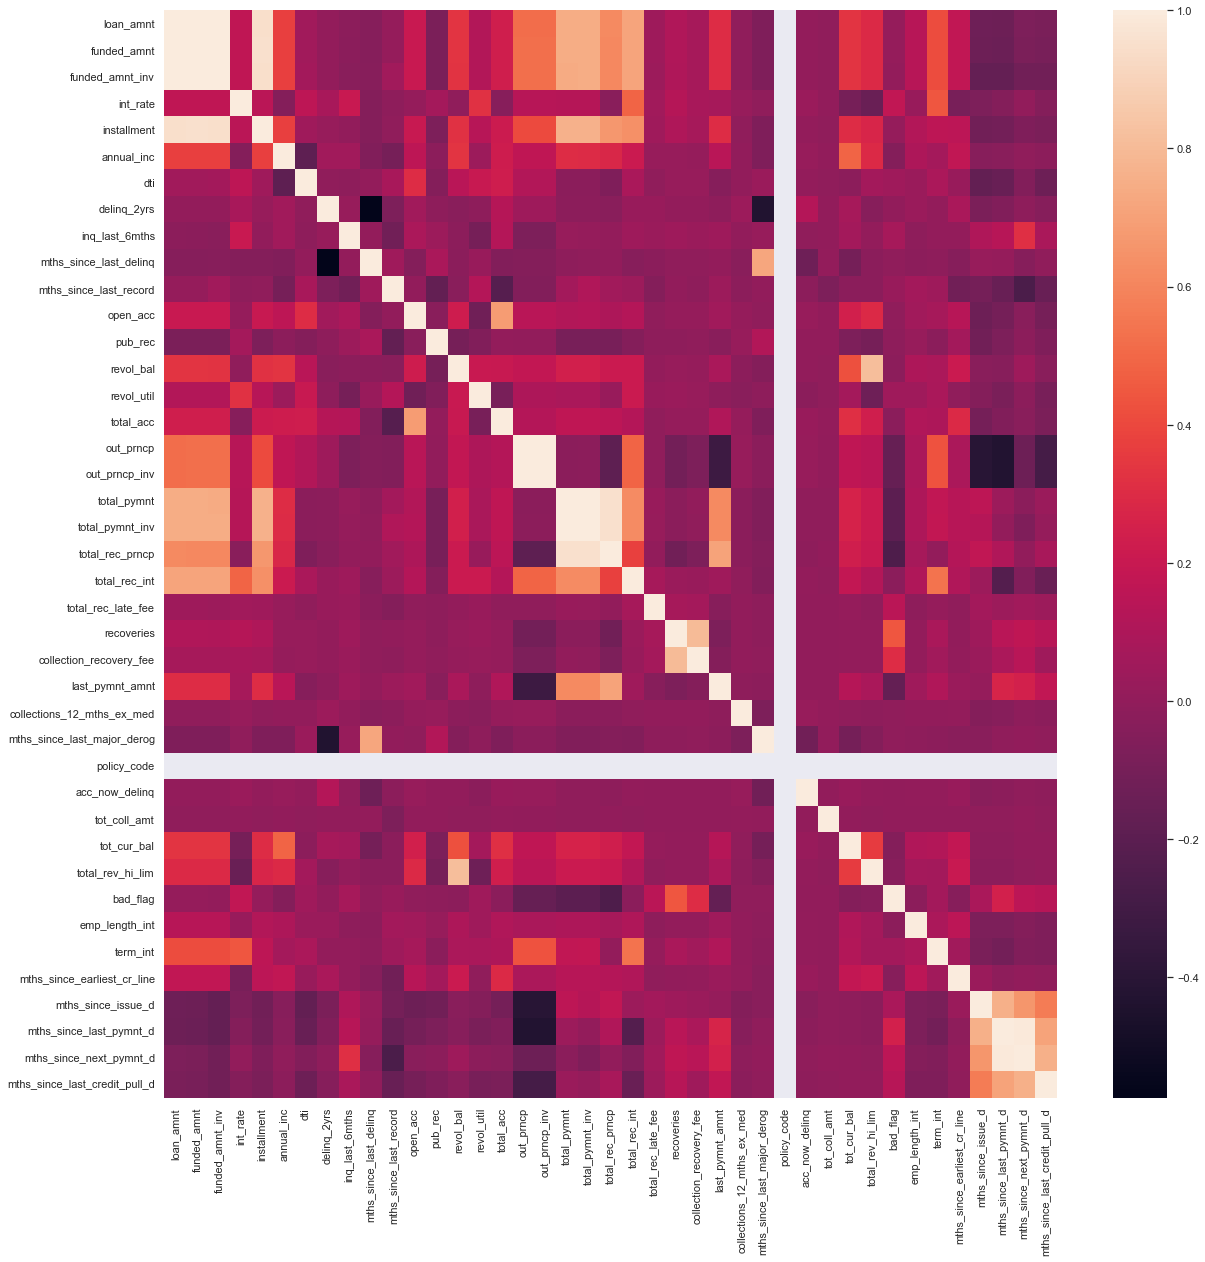

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [39]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27624\1624107534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [40]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [41]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

# Check Categorical Features

In [42]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini, fitur dengan nilai unik yang sangat tinggi (high cardinality) dan fitur dengan nilai unik hanya satu dibuang.

In [43]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [44]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       509
mths_since_issue_d                 91
dtype: int64

Ternyata, pada tipe data selain object juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [45]:
data.drop(['policy_code'], axis=1, inplace=True)

In [46]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [47]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

# Missing Value Checking

In [49]:
# Calculate the percentage of missing values for each column
check_missing = data.isnull().mean() * 100

# Filter and sort columns with missing values in descending order
missing_columns = check_missing[check_missing > 0].sort_values(ascending=False)

# Display the result
print(missing_columns)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64


Di sini, kolom-kolom dengan missing values di atas 75% dibuang

In [50]:
data.drop('mths_since_last_record', axis=1, inplace=True)

# Missing Values Filling

In [51]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

# One Hot Encoding
Semua kolom kategorikal dilakukan One Hot Encoding.

In [52]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [53]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [54]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Standardization
Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [55]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [57]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,1.767577,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,-0.215525,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,-0.568836,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,0.228963,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,0.240361,1.446626


# Transformed Dataframe
Menggabungkan kembali kolom-kolom hasil transformasi

In [58]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELING
Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split

X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

# Training
Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [63]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,4.236089e-01
88,out_prncp,1.556015e-01
89,total_rec_late_fee,1.244826e-01
77,int_rate,9.402729e-02
3,grade_E,2.951557e-02
98,mths_since_issue_d,2.524645e-02
4,grade_F,2.358595e-02
0,grade_B,1.591787e-02
96,term_int,1.583737e-02
78,annual_inc,1.237429e-02


# Validation
Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [64]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

# AUC

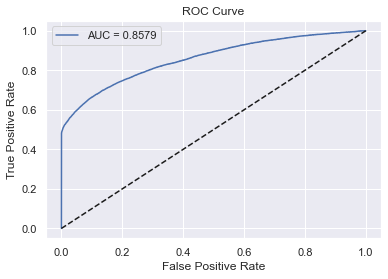

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# KS

In [69]:
# Sort the DataFrame by 'y_pred_proba'
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')

# Calculate cumulative statistics using vectorized operations
df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

# Reset the index if needed
df_actual_predicted = df_actual_predicted.reset_index(drop=True)

In [70]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,279378,0,0.048805,1,0,1,0.000011,0.0,0.000012
1,372253,0,0.049106,2,0,2,0.000021,0.0,0.000024
2,321938,0,0.049276,3,0,3,0.000032,0.0,0.000036
3,344212,0,0.049301,4,0,4,0.000043,0.0,0.000048
4,334474,0,0.049424,5,0,5,0.000054,0.0,0.000060


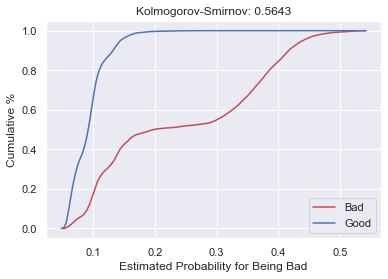

In [71]:
import matplotlib.pyplot as plt

# Calculate KS
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

# Plot Cumulative Percentage
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r', label='Bad')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b', label='Good')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title(f'Kolmogorov-Smirnov: {KS:.4f}')
plt.legend()

# Show the plot
plt.show()

Model yang dibangun menghasilkan performa dengan AUC = 0.857 dan KS = 0.56. Biasanya, AUC di atas 0.7 dan KS di atas 0.3 menunjukkan performa yang baik.